<a href="https://colab.research.google.com/github/RUGameLink/data-analytics/blob/main/machine_learning_mod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Библиотечки и модули

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import fashion_mnist #В обучающей выборке 60 тыс. рисунков и 10 тыс в тестовой
from tensorflow.keras.models import Sequential #Последовательная модель слоев
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils

Раздробление датасэта на обучающую и тестовую

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] #Даем название классам

Предварительная обработка данных

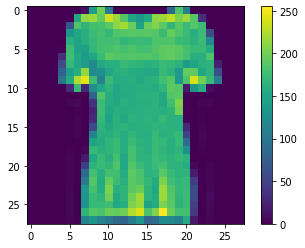

In [ ]:
plt.figure()
plt.imshow(x_train[10])
plt.colorbar()
plt.grid(False)

Нормализация данных в пределах от 0 до 255 (если пиксель темный - 0, если светлый - 255) 

In [ ]:
x_train = x_train / 255 #Делим на 255, чтобы диапазон входных данных был в пределах от 0 до 1
x_test = x_test / 255

Проверяем результат нормализации

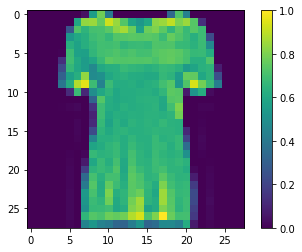

In [ ]:
plt.figure()
plt.imshow(x_train[10])
plt.colorbar()
plt.grid(False)

Просмотр нескольких изображений с метками

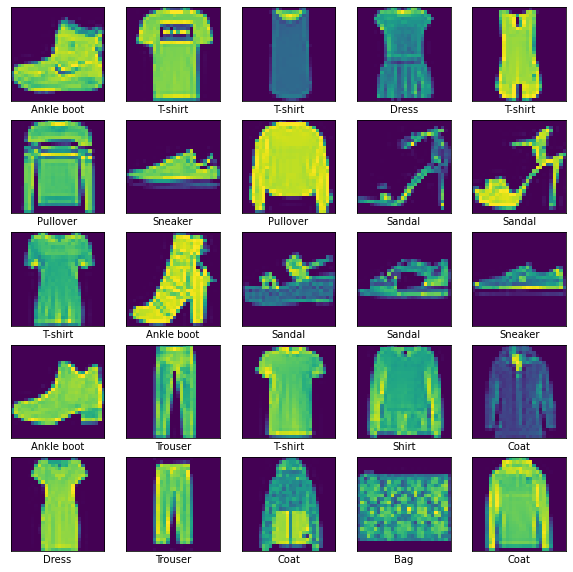

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
  plt.xlabel(class_names[y_train[i]])

Инициализация нейронной сети

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)), #Преобрабование изорбажения в массив
                          keras.layers.Dense(128, activation="relu"), #Входной слой (полносвязный)
                          keras.layers.Dense(10, activation="softmax")
])

Компиляция модели (указание параметров обучения)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
#Используем стахостический градиентный спуск в кач-ве оптимизатора, функция ошибки - категориальная перекрестная энтропия, параметр качества - accuracy (доля правильных ответов)

Смотрим параметры

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Обучение сети

In [ ]:
model.fit(x_train, y_train, epochs=10) #Обучение с учителем (что видно, но если забуду)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7496 - accuracy: 0.7564
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5148 - accuracy: 0.8253
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4694 - accuracy: 0.8386
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4447 - accuracy: 0.8460
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4264 - accuracy: 0.8524
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4135 - accuracy: 0.8561
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4007 - accuracy: 0.8607
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3914 - accuracy: 0.8640
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3816 - accuracy: 0.8691
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.374

Проверяем на тестовой

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точность предсказания:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4380 - accuracy: 0.8485
Точность предсказания: 0.8485000133514404


Проверим сеть на компетентность 

In [ ]:
predict = model.predict(x_train)

1875/1875 [==============================] - 3s 2ms/step


In [ ]:
k = 15 #индекс предмета
predict[k]

array([2.1267754e-08, 5.1862337e-09, 1.7439863e-09, 7.7548507e-10,
       3.5187722e-09, 1.3550005e-03, 6.9152120e-09, 1.3465578e-03,
       6.0964558e-06, 9.9729234e-01], dtype=float32)

In [ ]:
np.argmax(predict[k])

9

In [ ]:
y_train[k]

9

Наглядная проверка результата

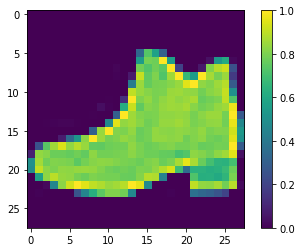

In [ ]:
plt.figure()
plt.imshow(x_train[k])
plt.colorbar()
plt.grid(False)

In [ ]:
class_names[np.argmax(predict[k])]

'Ankle boot'

In [ ]:
x_train[0]


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

================================================================================


In [ ]:
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()
im = Image.open(BytesIO(uploaded['test.png']))

Saving test.png to test.png


In [ ]:
im= np.array(im)

In [ ]:
im = im / 255
im

array([[[0.26666667, 0.00392157, 0.32941176],
        [0.26666667, 0.00392157, 0.32941176],
        [0.26666667, 0.00392157, 0.32941176],
        ...,
        [0.26666667, 0.00392157, 0.32941176],
        [0.26666667, 0.00392157, 0.32941176],
        [0.26666667, 0.00392157, 0.32941176]],

       [[0.26666667, 0.00392157, 0.32941176],
        [0.26666667, 0.00392157, 0.32941176],
        [0.26666667, 0.00392157, 0.32941176],
        ...,
        [0.26666667, 0.00392157, 0.32941176],
        [0.26666667, 0.00392157, 0.32941176],
        [0.26666667, 0.00392157, 0.32941176]],

       [[0.26666667, 0.00392157, 0.32941176],
        [0.26666667, 0.00392157, 0.32941176],
        [0.26666667, 0.00392157, 0.32941176],
        ...,
        [0.26666667, 0.00392157, 0.32941176],
        [0.26666667, 0.00392157, 0.32941176],
        [0.26666667, 0.00392157, 0.32941176]],

       ...,

       [[0.26666667, 0.00392157, 0.32941176],
        [0.25882353, 0.02352941, 0.3372549 ],
        [0.23529412, 0

In [ ]:
test = model.predict(im)
test

1/1 [==============================] - 0s 29ms/step


array([[1.0195912e-02, 2.1780422e-03, 1.4965788e-02, 8.3416759e-04,
        1.0422801e-03, 2.0615851e-04, 2.9417214e-03, 2.3923087e-04,
        9.6673501e-01, 6.6167302e-04],
       [5.3330589e-02, 6.6938172e-03, 3.5319224e-02, 6.4383820e-03,
        4.9704913e-04, 3.5905701e-04, 2.4485143e-02, 2.4013937e-04,
        8.7174845e-01, 8.8808115e-04],
       [3.1602066e-02, 1.5878728e-02, 5.7203159e-02, 3.4335933e-03,
        1.1225007e-03, 1.0480229e-04, 2.4017567e-02, 2.9022322e-04,
        8.6587703e-01, 4.7025626e-04]], dtype=float32)

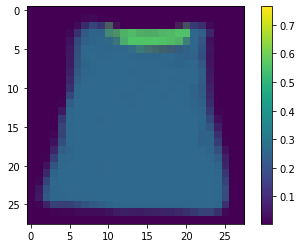

In [ ]:
plt.figure()
plt.imshow(im)
plt.colorbar()
plt.grid(False)

In [ ]:
class_names[np.argmax(test)]

'Bag'